In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Quintile Distribution Analysis/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Quintile Distribution Analysis/Output')
cur_date = "011123"

library(readxl)
library(tidyverse)
library(reshape2)
#library(car)

# reading in files
acs_whp_df = data.frame(read_excel("010923_Imputed_ACS_WHP_Data.xlsx")) %>%
    # removing uneeded variables
    select(-c("Avg_ACRES", "Wildfire_Hazard_Potential_Quintile_Percentage")) 
# converting quintile col into a character
acs_whp_df$Wildfire_Hazard_Potential_Quintile_Number = as.character(acs_whp_df$Wildfire_Hazard_Potential_Quintile_Number)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(acs_whp_df)

,GEO_ID,Census_Tract,County,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Sex_Ratio,Median_Age,Population_Under_18,Population_Over_18,Population_Over_65,⋯,Less_than_High_School,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,92.23704,1,87.2,37.3,21.9,78.1,15.1,⋯,40.7,30.1,21.1,0.9,13.9,9.9,17.7,5.4,32.1,28.1
2,14000US37001020200,202.00,Alamance,92.23704,1,78.3,31.0,29.1,70.9,11.2,⋯,32.6,40.0,18.9,12.4,22.5,20.5,24.3,10.6,43.1,43.0
3,14000US37001020300,203.00,Alamance,92.23704,1,77.8,40.7,27.1,72.9,18.9,⋯,37.3,5.9,22.6,4.6,10.3,6.0,14.4,3.9,27.5,32.7
4,14000US37001020400,204.00,Alamance,92.23704,1,78.1,30.5,31.4,68.6,10.1,⋯,39.3,25.3,16.3,5.4,18.9,16.7,20.4,10.9,35.1,38.3
5,14000US37001020501,205.01,Alamance,92.23704,1,92.7,35.1,23.3,76.7,15.6,⋯,6.1,14.9,3.5,1.5,5.4,1.3,9.7,1.5,24.0,14.5
6,14000US37001020502,205.02,Alamance,92.23704,1,99.0,32.1,30.0,70.0,8.9,⋯,26.6,29.9,10.8,5.2,10.0,5.9,15.9,2.2,33.5,41.4


Will use t tests to see if WHP quintiles are depedent on the distributions of each of the sociodemographic variables. 

In [3]:
# normalizing data before conducting t tests
scaled_acs_whp_df = acs_whp_df 
scaled_acs_whp_df[,6:43] = scale(scaled_acs_whp_df[,6:43])
head(scaled_acs_whp_df)

,GEO_ID,Census_Tract,County,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Sex_Ratio,Median_Age,Population_Under_18,Population_Over_18,Population_Over_65,⋯,Less_than_High_School,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,92.23704,1,-0.15189540,-0.39145796,0.05790805,-0.05602057,-0.1998248,⋯,0.82774759,1.45024585,1.12439570,-0.70891714,0.8962378,0.55789303,0.97102207,0.41298705,1.0131053,0.4065080
2,14000US37001020200,202.00,Alamance,92.23704,1,-0.22096992,-1.21708961,1.23133016,-1.23486091,-0.7146796,⋯,0.36101901,2.41045622,0.86870376,1.13733354,2.2068522,2.32579117,1.74464674,1.66277940,1.8550555,1.5016521
3,14000US37001020300,203.00,Alamance,92.23704,1,-0.22485051,0.05412103,0.90537957,-0.90740526,0.3018286,⋯,0.63183683,-0.89693505,1.29873111,-0.11490605,0.3476086,-0.09256006,0.58420973,0.05247002,0.6610171,0.7446062
4,14000US37001020400,204.00,Alamance,92.23704,1,-0.22252216,-1.28261593,1.60617334,-1.61143491,-0.8598951,⋯,0.74707845,0.98468931,0.56652239,0.01352878,1.6582229,1.69201637,1.28750489,1.73488280,1.2427281,1.1562040
5,14000US37001020501,205.01,Alamance,92.23704,1,-0.10920890,-0.67977377,0.28607346,-0.28523953,-0.1338178,⋯,-1.16593254,-0.02401654,-0.92113978,-0.61259101,-0.3991368,-0.87643942,0.03329519,-0.52435722,0.3931238,-0.5930866
6,14000US37001020502,205.02,Alamance,92.23704,1,-0.06031346,-1.07293170,1.37800793,-1.38221595,-1.0183119,⋯,0.01529413,1.43084766,-0.07270745,-0.01857993,0.3018894,-0.10923834,0.76003352,-0.35611594,1.1202626,1.3840528


## Table of Contrasts
>                   "1"  |  "2"  |  "3"  |  "4"  |  "5"  
>     Contrast 1 |  -1   |   1   |   0   |   0   |   0   
>     Contrast 2 |  -1   |   0   |   1   |   0   |   0   
>     Contrast 3 |  -1   |   0   |   0   |  -1   |   0   
>     Contrast 4 |  -1   |   0   |   0   |   0   |  -1  
>     Contrast 5 |   0   |  -1   |   1   |   0   |   0  
>     Contrast 6 |   0   |  -1   |   0   |   1   |   0  
>     Contrast 7 |   0   |  -1   |   0   |   0   |   1  
>     Contrast 8 |   0   |   0   |  -1   |   1   |   0  
>     Contrast 9 |   0   |   0   |  -1   |   0   |   1  
>     Contrast 10|   0   |   0   |   0   |  -1   |   1  

In [4]:
# creating a table of comparisons for a loop to iterate through based on the above contrasts
Quintile_Comparison_1 = c("1","1","1","1","2","2","2","3","3","4")
Quintile_Comparison_2 = c("2","3","4","5","3","4","5","4","5","5")

quintile_comparison_df = data.frame(cbind(Quintile_Comparison_1, Quintile_Comparison_2))
head(quintile_comparison_df)

,Quintile_Comparison_1,Quintile_Comparison_2
,<chr>,<chr>
1,1,2
2,1,3
3,1,4
4,1,5
5,2,3
6,2,4


In [5]:
t_test_values = function(scaled_df, comparison_df){
    # """
    # Running t tests after filtering for quintiles and variables using a loop. 
    # Ultimately using this test to compare WHP quintiles within each variable.

    # :param: scaled df with ACS and WHP data, quintile comparison df
    # :output: a dataframe containing the variable, two quintiles compared, statistic, p value, p adj

    # """
    sociodemographic_variables = colnames(scaled_df)[6:43]
    
    values_df = data.frame()
    # iterating through each variable, comparison row

    for(i in 1:length(comparison_df$Quintile_Comparison_1)){
        for(j in 1:length(sociodemographic_variables)){
            # "baseline" quintile df
            baseline_df = scaled_df %>%
                filter(Wildfire_Hazard_Potential_Quintile_Number == comparison_df$Quintile_Comparison_1[i])

            # "treatment" quintile df
            treatment_df = scaled_df %>%
                filter(Wildfire_Hazard_Potential_Quintile_Number == comparison_df$Quintile_Comparison_2[i])

            # t test
            t_test = t.test(baseline_df[[sociodemographic_variables[j]]], treatment_df[[sociodemographic_variables[j]]])


            # contains variable compared, quintiles compared, u stat, and p value
            values_vector = cbind(sociodemographic_variables[j], comparison_df$Quintile_Comparison_1[i],
                                  comparison_df$Quintile_Comparison_2[i], t_test$statistic, t_test$p.value)
            values_df = rbind(values_df, values_vector)
            }
        }

    # adding col names
    colnames(values_df) = c("Variable", "Quintile Comparison 1", "Quintile Comparison 2", "Statistic", "P Value")
    
    # converting cols from character to numeric
    values_df$Statistic = as.numeric(values_df$Statistic)
    values_df$`P Value` = as.numeric(values_df$`P Value`) 
    
    # calculating padj values
    values_df$`P Adj` = p.adjust(values_df$`P Value`, method = "fdr")
    
    return(values_df)
}

# calling fn
t_test_df = t_test_values(scaled_acs_whp_df, quintile_comparison_df)
head(t_test_df)

,Variable,Quintile Comparison 1,Quintile Comparison 2,Statistic,P Value,P Adj
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
t,Sex_Ratio,1,2,-0.1795868,8.575186e-01,9.013818e-01
t1,Median_Age,1,2,-0.1572966,8.750477e-01,9.085195e-01
t2,Population_Under_18,1,2,0.1699357,8.651001e-01,9.031265e-01
t3,Population_Over_18,1,2,-0.1706842,8.645117e-01,9.031265e-01
t4,Population_Over_65,1,2,2.6792560,7.517580e-03,1.604877e-02
t5,Race_White,1,2,-7.6278543,6.538466e-14,2.336935e-12


In [6]:
# exporting data
write.csv(t_test_df, paste0(Output,"/", cur_date, "_Quintile_Distribution_Analysis.csv"), row.names = FALSE)

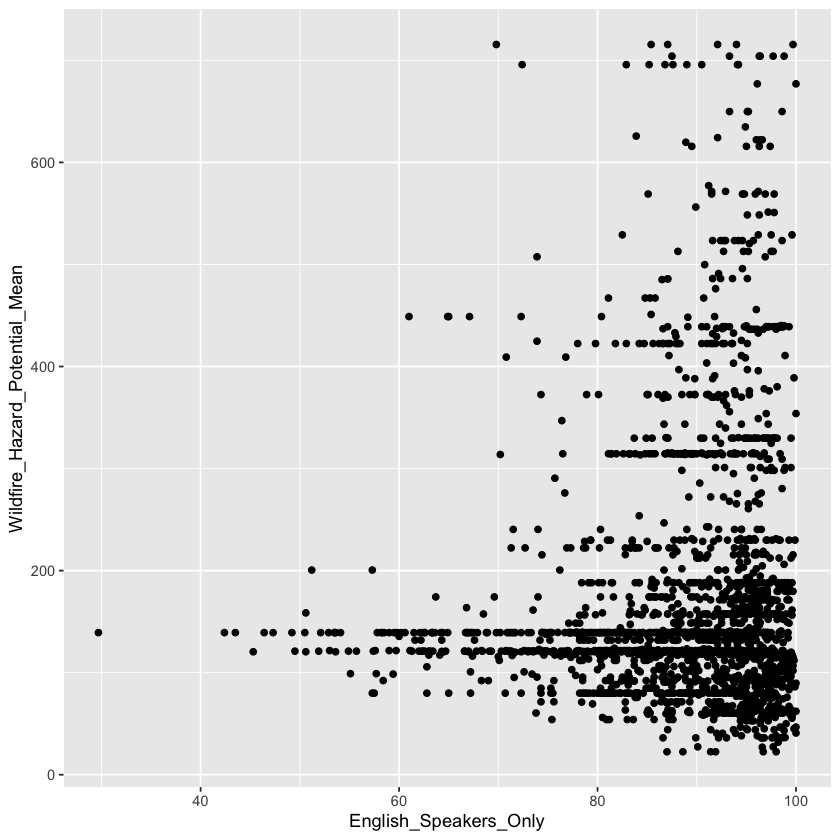

In [13]:
ggplot(acs_whp_df, aes(x = English_Speakers_Only, y = Wildfire_Hazard_Potential_Mean)) + 
  geom_point()